In [ ]:
from smach_utils2 import *
import matplotlib.pyplot as plt
#arm = moveit_commander.MoveGroupCommander('arm')


In [ ]:
req = ActionPlannerRequest()
req.timeout=300
req
command=action_planner_server(req)
command.plan.data
#talk(command.plan.data)

In [ ]:
command.plan.data

In [ ]:
rgbd.get_image()

In [ ]:
rgbd.get_image()

In [ ]:
actions=[]
params=[]
for command in command.plan.data.split(','):
    print (command)
    action = command.split('(')[0]  # Get the part before '('
    param = command.split('(')[1][:-1]  # Get the part inside '()'
    # Append to the respective arrays
    actions.append(action)
    params.append(param)

In [ ]:
actions

In [ ]:
command_msg.data="""Navigate (Counter)
PickObject (Cloth)
BringObject (Counter -> EnadTable, Place Cloth)
IdentifyObject (Cloth on EndTable)"""

In [ ]:
"""Navigate (Counter)
PickObject (Cloth)
BringObject (Counter -> EndTable, Place Cloth)
IdentifyObject (Cloth on EndTable)"""

In [ ]:
plan="plan = [ Navigate(Desk),FollowPerson(Skyler),Navigate(DiningRoom)]"

plan.split("=")[1].strip("[ ]")


In [ ]:
command_msg = String()
command_msg.data=plan.split("=")[1].strip("[ ]")
        #succ = wait_for_push_hand(100) # NOT GAZEBABLE

In [ ]:
plan="plan = [ Navigate(Desk),FollowPerson(Skyler),Navigate(DiningRoom)]"
command_msg.data=plan.split("=")[1].strip("[ ]")
actions=[]
params=[]
for command in command_msg.data.split(','):
    print (command)
    action = command.split('(')[0]  # Get the part before '('
    param = command.split('(')[1][:-1]  # Get the part inside '()'
    
    # Append to the respective arrays
    actions.append(action)
    params.append(param)
actions,params

In [ ]:
for command in command_msg.data.split(', '):
    print(command.split(' ', 1)[0])

In [ ]:
actions=[]
params=[]
for command in command_msg.data.split(','):
    print(command.split(',')[0].split(' ', 1)[0],command.split(',')[0].split(' ', 1)[1].strip('()'))
    actions.append(command.split(',')[0].split(' ', 1)[0])
    params.append(command.split(',')[0].split(' ', 1)[1].strip('()'))

In [ ]:
actions.pop(0)
print(f'yo{actions}')

In [ ]:
head.set_joint_values([ 0.0, -0.5])
rospy.sleep(5.0)                

In [ ]:
head.set_joint_values([ 0.0, -0.5])
rospy.sleep(5.0)                        
img_msg  = bridge.cv2_to_imgmsg( cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR))### GAZEBO BGR!?!??!
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)        
res      = classify_client(req)
objects, poses=detect_object_yolo('cloth',res)   

In [ ]:
head.set_joint_values([ 0.0, -0.5])
rospy.sleep(5.0)                
find_placing_area()

In [ ]:
pos, quat = tf_man.getTF(target_frame = 'placing_area', ref_frame = 'odom')                  

line_up_TF('placing_area')


In [ ]:

from action_server.msg import IdentifyPersonAction, IdentifyPersonGoal



client = actionlib.SimpleActionClient('identify_person', IdentifyPersonAction)
client.wait_for_server()



In [ ]:
goal = IdentifyPersonGoal(command="start")
client.send_goal(goal)

client.wait_for_result()
result = client.get_result()

rospy.loginfo(f"Result: {result.result}, Name: {result.name}, Face Image Path: {result.face_img_path}")


In [ ]:
result

In [ ]:
order=wait_for_qr(25)

In [ ]:
whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
pose = whole_body.get_current_pose()
pose.pose.position.z

In [ ]:
pose

In [ ]:
pose.pose.position.z

In [ ]:
pose

In [ ]:
arm = moveit_commander.MoveGroupCommander('arm')

In [ ]:
camel_to_snake("place_action")

In [ ]:
import re

def camel_to_snake(name):
    # Converts camelCase or PascalCase to snake_case
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()


In [14]:
from smach_utils_receptionist import *
import matplotlib.pyplot as plt


In [15]:
df_locs=yaml_to_df()
seat_places = df_locs[df_locs['child_id_frame'].str.startswith('seat_place_')]
for index, row in seat_places.iterrows():
    #print(f'pose= {row.x,row.y,1.0}, quat={row.qx,row.qy,row.qz,row.qw,}')
    pose=[row.x,row.y,1.0]
    quat=[row.qx,row.qy,row.qz,row.qw]
    print(pose,quat,row.child_id_frame)
    tf_man.pub_static_tf(pose,quat,row.child_id_frame)


In [16]:
for index, row in seat_places.iterrows():
    #print(f'pose= {row.x,row.y,1.0}, quat={row.qx,row.qy,row.qz,row.qw,}')
    pose=[row.x,row.y,1.0]
    quat=[row.qx,row.qy,row.qz,row.qw]
    print(pose,quat,row.child_id_frame)
    tf_man.pub_static_tf(pose,quat,row.child_id_frame)


[-1.185, -1.309, 1.0] [0.0, 0.0, -0.999, 0.01] seat_place_1
[-1.058, -0.781, 1.0] [0.0, 0.0, -0.999, -0.024] seat_place_2
[-1.087, -1.733, 1.0] [0.0, 0.0, -0.999, 0.023] seat_place_3
[-0.823, -1.839, 1.0] [0.0, 0.0, -0.685, 0.727] seat_place_4
[-0.826, -0.543, 1.0] [0.0, 0.0, 0.745, 0.666] seat_place_5


In [26]:
head.to_tf('seat_place_2')

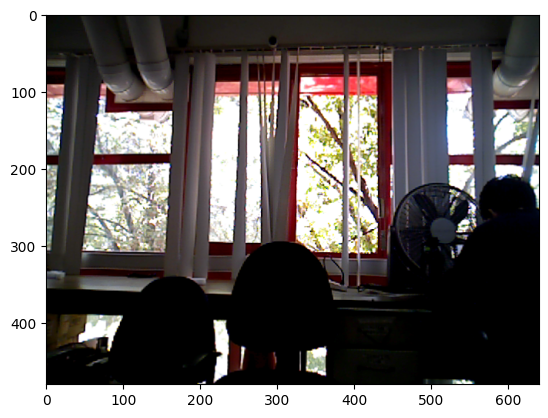

In [23]:
plt.imshow(rgbd.get_image())

In [27]:
wait_for_face()

Got  image with shape (480, 640, 3)
at least one face found
0 yeah
return res,img Ds: 
  data: 0.8500000238418579
Angs: 
  data: [199.0, 233.0, 251.0, 181.0]
Ids: 
  ids: "yeah"


(Ds: 
   data: 0.8500000238418579
 Angs: 
   data: [199.0, 233.0, 251.0, 181.0]
 Ids: 
   ids: "yeah",
 array([[[ 98, 104,  87],
         [ 64,  71,  59],
         [ 56,  67,  72],
         ...,
         [ 63,  71,  60],
         [ 62,  71,  59],
         [ 63,  71,  58]],
 
        [[ 99, 113, 108],
         [ 58,  71,  65],
         [ 50,  66,  67],
         ...,
         [ 63,  72,  57],
         [ 64,  72,  58],
         [ 64,  72,  58]],
 
        [[105, 114, 115],
         [ 56,  66,  67],
         [ 49,  64,  64],
         ...,
         [ 66,  73,  60],
         [ 67,  73,  61],
         [ 66,  73,  61]],
 
        ...,
 
        [[ 18,   0,   0],
         [ 16,   0,   0],
         [  1,   0,   0],
         ...,
         [ 35,  39,  31],
         [ 26,  26,  20],
         [ 16,  13,  18]],
 
        [[ 20,   0,   0],
         [ 15,   0,   0],
         [  0,   0,   0],
         ...,
         [ 32,  32,  33],
         [ 25,  24,  27],
         [ 17,  14,  21]],
 
        [[ 19,   